## Variable Selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('data_norm_vif_v2.csv', sep=';', encoding='utf-8')

In [4]:
data.head()

,district_1,district_10,district_11,district_12,district_13,district_14,district_15,district_16,district_17,district_18,...,WordCloudHighTri,WordCloudHighTriTail,WCSentAllTriTail,RevLen,Points,TriLowProb,TriMedProb,TriHighProb,funny,stars
0,0,0,0,0,0,0,0,0,0,0,...,-0.530980,-0.033799,0.000351,-0.191533,-0.539809,-0.32935,-0.240948,-0.317946,-0.404404,3.5
1,0,0,0,0,0,0,0,0,0,0,...,-0.530980,-0.033799,0.000351,1.155857,0.039941,-0.32935,-0.240948,-0.317946,-0.404404,4.5
2,0,0,0,0,0,0,0,0,0,0,...,-0.530980,-0.033799,0.000351,-0.503945,0.470362,-0.32935,-0.240948,-0.317946,-0.207022,4.5
3,0,0,0,0,0,0,0,0,0,0,...,-0.015852,-0.033799,0.000351,-0.500877,0.525262,-0.32935,-0.240948,0.797956,-0.108331,4.5
4,0,0,0,0,1,0,0,0,0,0,...,0.842695,-0.033799,0.000351,-1.325887,-0.598369,2.47658,-0.240948,2.657793,-0.404404,3.0


In [5]:
data.dtypes[data.dtypes == object]

Series([], dtype: object)

In [6]:
features = list(data.columns)
features.remove('stars')

In [7]:
# Hacemos el split para que los datos de test no intervengan en el feature selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data['stars'], test_size=0.25, random_state=42)

In [8]:
type(y_train), type(X_train)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### RFE. Recursive Feature Elimination using Support Vector Regressor

In [8]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [9]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=0.1)
selector = selector.fit(X_train, y_train)

In [10]:
selector.ranking_

array([ 5,  4,  9,  8, 10,  5,  5,  7,  1,  1,  7,  9,  1,  3,  8,  6,  5,
        6,  6,  5,  3,  9,  4,  3,  1,  6,  3,  4,  6,  4, 10,  1,  7,  7,
        1,  2,  1,  7,  8, 10,  3,  4,  8,  8,  7,  3,  7,  2,  2, 10,  9,
        4,  6, 10, 10,  9,  3, 10,  1,  1,  1,  8,  1, 10,  5,  4,  7,  3,
        2,  1,  1,  1,  1,  4,  1,  1,  2,  1,  5,  1,  3,  8, 10,  7,  3,
        4,  6,  3,  5,  9,  8,  5,  2,  6,  6,  7,  4,  2,  6,  9,  9,  5,
        8,  5,  8,  4,  9,  9, 10,  6,  1,  7,  8, 10,  9])

In [11]:
len(selector.support_), len(features)

(115, 115)

In [12]:
filtered_list = [i for (i, j) in zip(features, selector.support_) if j]

In [13]:
# La selección realizada no parece ajustarse a ningún enfoque de negocio con sentido ya que incluye prácticamente 
# distritos de BW
filtered_list

[u'district_17',
 u'district_18',
 u'district_20',
 u'district_Craiglockhart',
 u'district_Gilmerton/Inch',
 u'district_Granton and District',
 u'district_Juniper Green',
 u'district_Stuttgart Bad Cannstatt',
 u'district_Stuttgart Birkach',
 u'district_Stuttgart Botnang',
 u'district_Stuttgart Feuerbach',
 u'district_Stuttgart Obertcrkheim',
 u'district_Stuttgart Ost',
 u'district_Stuttgart Plieningen',
 u'district_Stuttgart Scd',
 u'district_Stuttgart Stammheim',
 u'district_Stuttgart Untertcrkheim',
 u'district_Stuttgart Wangen',
 u'district_Stuttgart West',
 u'Points']

### Feature Importance using Tree-based feature selection

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

In [15]:
clf = ExtraTreesRegressor(random_state=42)
clf = clf.fit(X_train, y_train)
clf.feature_importances_      

array([  2.45193407e-03,   2.80305972e-03,   1.92045612e-03,
         5.33371001e-03,   4.50010405e-03,   2.91813300e-03,
         3.86670832e-03,   2.59856371e-03,   1.08490536e-02,
         8.21617010e-05,   7.90735022e-03,   2.64891039e-03,
         1.80049716e-04,   2.92718761e-03,   5.69007584e-03,
         2.98937207e-03,   4.33310652e-03,   5.04198115e-04,
         2.67524965e-03,   4.88294441e-03,   2.82967030e-06,
         1.44415905e-03,   1.86501152e-04,   7.47217908e-05,
         3.85894261e-05,   6.61209673e-04,   2.32755537e-04,
         4.61279412e-05,   1.07246046e-05,   8.22916716e-05,
         1.47938094e-04,   1.26629594e-04,   2.28527003e-03,
         7.17497709e-04,   2.34068216e-04,   3.83323439e-04,
         1.40264620e-05,   2.45515551e-03,   1.33230593e-03,
         2.05788711e-03,   5.36911290e-04,   1.06754285e-05,
         1.72306201e-03,   1.83710530e-03,   8.03805456e-04,
         4.14970506e-04,   8.04829095e-03,   8.45493798e-03,
         1.72351819e-04,

In [16]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(6012L, 17L)

In [31]:
# Ordenamos la lista de features por importancia 
sorted(zip(features, clf.feature_importances_), key = lambda x: x[1])[::-1][:17]

[(u'Points', 0.34925123076683889),
 (u'WCSentEng', 0.093214688073219559),
 (u'NegCloud', 0.05523048901280446),
 (u'RevLen', 0.041244761973345645),
 (u'WordCloudHigh', 0.0378046680843835),
 (u'WordCloudHighGer', 0.029430737999222911),
 (u'WCSentGer', 0.026488612283481993),
 (u'review_count', 0.024169742996141424),
 (u'funny', 0.02034912677279568),
 (u'TriLowProb', 0.017983978837789762),
 (u'WordCloudHighTri', 0.016618081592012252),
 (u'main_cat_Others', 0.016119848283084846),
 (u'main_cat_Beauty & Spas', 0.012474579512593327),
 (u'main_cat_Shopping', 0.011442853735780927),
 (u'district_17', 0.010849053559709918),
 (u'main_cat_Food', 0.009051481507040238),
 (u'TriHighProb', 0.0087954232085630298)]

### Correlation Matrix

In [21]:
# Graficamos la matriz de correlación para las últimas columnas (numéricas) del dataset...
data.columns[-32:]

Index([u'main_cat_Arts & Entertainment', u'main_cat_Automotive',
       u'main_cat_Bars', u'main_cat_Beauty & Spas', u'main_cat_Coffee & Tea',
       u'main_cat_Event Planning & Services', u'main_cat_Fashion',
       u'main_cat_Food', u'main_cat_Health & Medical',
       u'main_cat_Home Services', u'main_cat_Hotels & Travel',
       u'main_cat_Nightlife', u'main_cat_Others', u'main_cat_Pets',
       u'main_cat_Shopping', u'likes', u'review_count', u'WordCloudHigh',
       u'WordCloudHighGer', u'WCSentEng', u'WCSentGer', u'NegCloud',
       u'WordCloudHighTri', u'WordCloudHighTriTail', u'WCSentAllTriTail',
       u'RevLen', u'Points', u'TriLowProb', u'TriMedProb', u'TriHighProb',
       u'funny', u'stars'],
      dtype='object')

In [22]:
c = list(data.columns[-32:])

In [23]:
corr = data[c].corr()

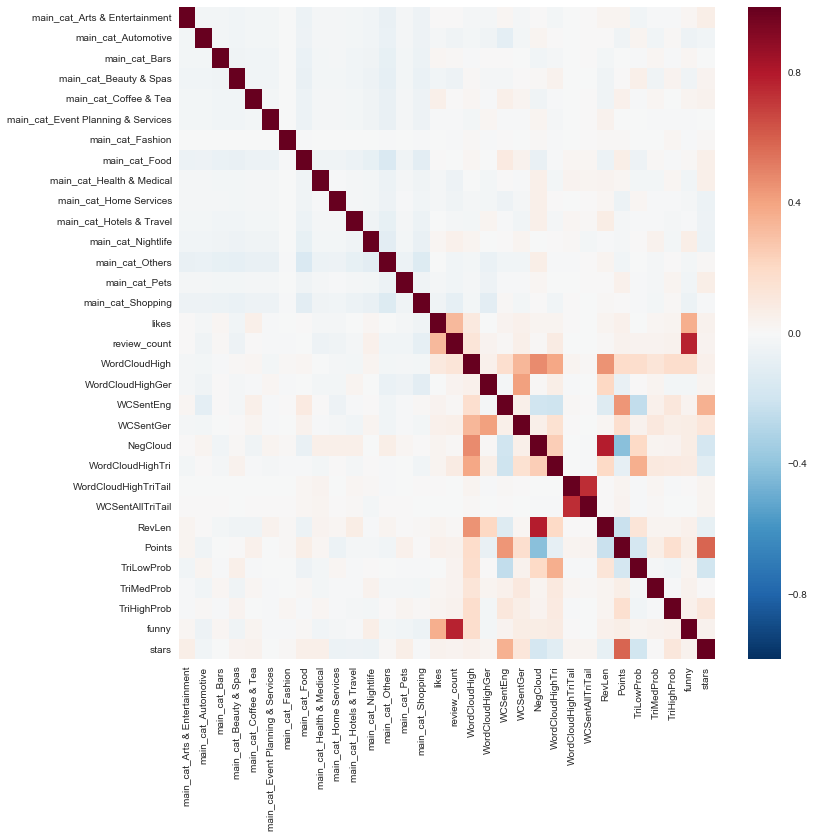

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(corr)

### Feature Selection using Lasso Regression

In [25]:
from sklearn import linear_model

In [26]:
vs = linear_model.Lasso(alpha=0.1, random_state=42)
vs.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
# Éstos son los coeficientes (2) de las variables seleccionadas tras la penalización.
vs.coef_, vs.intercept_

(array([-0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        ,  0. 

In [9]:
# Variables incluidas usando Lasso
features[-5], features[-12]

(u'Points', u'WCSentEng')

In [28]:
prd = vs.predict(X_test)

In [29]:
prd

array([ 3.58099395,  3.67140975,  3.93096655, ...,  3.28050911,
        3.22970906,  4.05861506])

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(prd, y_test)

0.41735451913545729